In [1]:
# Based on https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

import matplotlib.pyplot as plt
from sklearn import svm, datasets
import numpy as np
#from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

a = 1 # extra margin
x0, x1 = np.meshgrid(
    np.linspace(np.min(X[:,0])-a, np.max(X[:,0])+a, 200).reshape(-1, 1),
    np.linspace(np.min(X[:,1])-a, np.max(X[:,1])+a, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

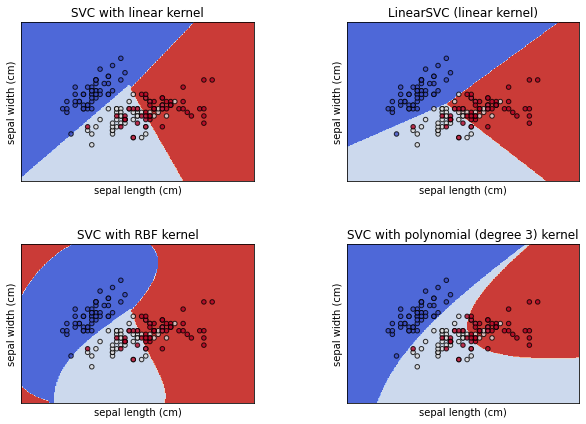

In [2]:
models_trained = (clf.fit(X, y) for clf in models)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(10,7))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for clf, title, ax in zip(models_trained, titles, sub.flatten()):
    y_predict = clf.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    ax.contourf(x0, x1, zz, cmap=plt.cm.coolwarm)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k", alpha=0.8)
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()
